# Notebook - Document Embeddings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from collections import Counter

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [193]:
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [4]:
proc_data=pd.read_csv('/Users/kshitijmittal/Desktop/automatic-essay-grading/data/preprocessed-essay.csv')
proc_data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,corrected_text,...,sent_count,sent_len,mistakes,num_mistakes,word_count,noun_count,verb_count,adjective_count,adverb_count,Score_Category
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,think students would benefit learning home won...,think students would benefit learning home won...,...,18,14.500000,NaN,0,261,61,25,25,5,medium
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,problem change let best matter happening chang...,problem change let best matter happening chang...,...,14,38.071429,NaN,0,533,100,56,37,9,medium
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,dear principal change school policy grade aver...,dear principal change school policy grade aver...,...,19,16.842105,NaN,0,320,58,20,33,5,medium
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,best time life become agree greatest accomplis...,best time life become agree greatest accomplis...,...,36,20.222222,NaN,0,728,106,73,62,22,high
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,small act kindness impact people change people...,small act kindness impact people change people...,...,3,78.000000,kindess homeles triying greate kindess wount t...,11,234,58,21,18,5,medium


In [6]:
proc_data['lemmatized_text']

0       think student would benefit learn home wont ch...
1       problem change let best matter happen change m...
2       dear principal change school policy grade aver...
3       best time life become agree great accomplishme...
4       small act kindness impact people change people...
                              ...                        
3906    believe use cellphone class education goodbye ...
3907    work alone student argue decision project work...
3908    problem chance best think quote cant best ever...
3909    many people disagree albert schweitzer quote e...
3910    think failure main thing people consist goal s...
Name: lemmatized_text, Length: 3911, dtype: object

In [7]:
proc_data['lemmatized_text'].isna().sum()

0

In [11]:
def string_to_list(string):
    return string.split()

In [ ]:
proc_data['lemmatized_text']=proc_data['lemmatized_text'].apply(lambda x: string_to_list(x))

In [16]:
proc_data['lemmatized_text']

0       [think, student, would, benefit, learn, home, ...
1       [problem, change, let, best, matter, happen, c...
2       [dear, principal, change, school, policy, grad...
3       [best, time, life, become, agree, great, accom...
4       [small, act, kindness, impact, people, change,...
                              ...                        
3906    [believe, use, cellphone, class, education, go...
3907    [work, alone, student, argue, decision, projec...
3908    [problem, chance, best, think, quote, cant, be...
3909    [many, people, disagree, albert, schweitzer, q...
3910    [think, failure, main, thing, people, consist,...
Name: lemmatized_text, Length: 3911, dtype: object

### CountVectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#vectorizer.fit(proc_data['lemmatized_text'])

In [25]:
proc_data['lemmatized_text'].apply(lambda x: ' '.join(x))

0       think student would benefit learn home wont ch...
1       problem change let best matter happen change m...
2       dear principal change school policy grade aver...
3       best time life become agree great accomplishme...
4       small act kindness impact people change people...
                              ...                        
3906    believe use cellphone class education goodbye ...
3907    work alone student argue decision project work...
3908    problem chance best think quote cant best ever...
3909    many people disagree albert schweitzer quote e...
3910    think failure main thing people consist goal s...
Name: lemmatized_text, Length: 3911, dtype: object

In [26]:
vectorized_text=vectorizer.fit_transform(proc_data['lemmatized_text'].apply(lambda x: ' '.join(x)))

In [28]:
df_vectorized = pd.DataFrame(vectorized_text.toarray(), columns=vectorizer.get_feature_names())

In [29]:
df_vectorized

,021419,03102020,031219,031519,03192019,032019,03202019,0492019,050,100,...,zealand,zealous,zelda,zero,zip,zombie,zone,zoo,zoology,zurkrbuirg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_vectorized.isna().sum().sum()

0

In [31]:
df_vectorized_array = df_vectorized.apply(lambda x: x.values if len(x.values.shape) == 1 else np.concatenate([x.values]), axis=1)

In [32]:
df_vectorized_array

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
3906    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3907    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3908    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3909    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3910    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Length: 3911, dtype: object

In [33]:
proc_data_2=proc_data.copy()
proc_data_2['count_vector']=df_vectorized_array

In [35]:
proc_data_2.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,corrected_text,...,sent_len,mistakes,num_mistakes,word_count,noun_count,verb_count,adjective_count,adverb_count,Score_Category,count_vector
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,think students would benefit learning home won...,think students would benefit learning home won...,...,14.500000,NaN,0,261,61,25,25,5,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,problem change let best matter happening chang...,problem change let best matter happening chang...,...,38.071429,NaN,0,533,100,56,37,9,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,dear principal change school policy grade aver...,dear principal change school policy grade aver...,...,16.842105,NaN,0,320,58,20,33,5,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,best time life become agree greatest accomplis...,best time life become agree greatest accomplis...,...,20.222222,NaN,0,728,106,73,62,22,high,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,small act kindness impact people change people...,small act kindness impact people change people...,...,78.000000,kindess homeles triying greate kindess wount t...,11,234,58,21,18,5,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### TF-IDF

In [45]:
def tf_idf(data):
    vectorizer = TfidfVectorizer(ngram_range=(1,1),min_df=10,max_features=100)
    vec_text = vectorizer.fit_transform(data)
    X = pd.DataFrame.sparse.from_spmatrix(vec_text)
    X.columns = vectorizer.get_feature_names_out().tolist()
    X=X.reset_index(drop=True)
    data=data.reset_index(drop=True)
    newdata = pd.concat([data, X],axis=1)
    del X
    gc.collect()
    return newdata


In [46]:
proc_data_2.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,corrected_text,...,sent_len,mistakes,num_mistakes,word_count,noun_count,verb_count,adjective_count,adverb_count,Score_Category,count_vector
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,think students would benefit learning home won...,think students would benefit learning home won...,...,14.500000,NaN,0,261,61,25,25,5,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,problem change let best matter happening chang...,problem change let best matter happening chang...,...,38.071429,NaN,0,533,100,56,37,9,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,dear principal change school policy grade aver...,dear principal change school policy grade aver...,...,16.842105,NaN,0,320,58,20,33,5,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,best time life become agree greatest accomplis...,best time life become agree greatest accomplis...,...,20.222222,NaN,0,728,106,73,62,22,high,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,small act kindness impact people change people...,small act kindness impact people change people...,...,78.000000,kindess homeles triying greate kindess wount t...,11,234,58,21,18,5,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_vectorizer = TfidfVectorizer(ngram_range=(1,1),min_df=10)

In [50]:
vec_text_tfidf=TFIDF_vectorizer.fit_transform(proc_data['lemmatized_text'].apply(lambda x: ' '.join(x)))

In [51]:
df_vectorized_tfid = pd.DataFrame(vec_text_tfidf.toarray())
#df_vectorized = pd.DataFrame(vectorized_text.toarray(), columns=vectorizer.get_feature_names())

In [52]:
df_vectorized_tfidf = pd.DataFrame(vec_text_tfidf.toarray())
df_vectorized_tfidf.columns = TFIDF_vectorizer.get_feature_names()

In [53]:
df_vectorized_tfidf.head()

,100,1000,2015,2019,911,ability,able,about,absent,absolutely,...,york,you,young,your,yourself,youth,youtube,zero,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.101337,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.026209,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df_vectorized_tfidf_array = df_vectorized_tfidf.apply(lambda x: x.values if len(x.values.shape) == 1 else np.concatenate([x.values]), axis=1)

In [55]:
proc_data_3=proc_data_2.copy()
proc_data_3['tfidf_vector']=df_vectorized_tfidf_array

In [56]:
proc_data_3.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,corrected_text,...,mistakes,num_mistakes,word_count,noun_count,verb_count,adjective_count,adverb_count,Score_Category,count_vector,tfidf_vector
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,think students would benefit learning home won...,think students would benefit learning home won...,...,NaN,0,261,61,25,25,5,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,problem change let best matter happening chang...,problem change let best matter happening chang...,...,NaN,0,533,100,56,37,9,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,dear principal change school policy grade aver...,dear principal change school policy grade aver...,...,NaN,0,320,58,20,33,5,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1013370114925..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,best time life become agree greatest accomplis...,best time life become agree greatest accomplis...,...,NaN,0,728,106,73,62,22,high,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0262089932239..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,small act kindness impact people change people...,small act kindness impact people change people...,...,kindess homeles triying greate kindess wount t...,11,234,58,21,18,5,medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [57]:
proc_data_3['tfidf_vector']

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1013370114925...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0262089932239...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
3906    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3907    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0599181271098...
3908    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3909    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3910    [0.0, 0.0, 0.0, 0.0, 0.0, 0.045831299837925034...
Name: tfidf_vector, Length: 3911, dtype: object

## Word2Vec + KMeans

In [58]:
import os
import random
import re
import string

from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)


In [103]:
processed_essays=[]

for x in proc_data_3['lemmatized_text']:
    processed_essays.append(x)

Train Word2Vec Model

In [65]:
W2V_model = Word2Vec(sentences=processed_essays, vector_size=100, workers=1, seed=SEED)

In [66]:
W2V_model.wv.most_similar("people")

[('others', 0.6974716186523438),
 ('everybody', 0.6119298338890076),
 ('someone', 0.5914008021354675),
 ('person', 0.5779016613960266),
 ('treat', 0.5327606201171875),
 ('somebody', 0.5240316390991211),
 ('side', 0.5126851797103882),
 ('depend', 0.4998084008693695),
 ('surround', 0.4980156421661377),
 ('matter', 0.4935484826564789)]

In [67]:
W2V_model.wv.most_similar("school")

[('schedule', 0.7056289315223694),
 ('regular', 0.6349310278892517),
 ('student', 0.6337170600891113),
 ('extra', 0.6326609253883362),
 ('class', 0.5883139371871948),
 ('early', 0.5796304941177368),
 ('flexible', 0.5709277987480164),
 ('skip', 0.5667584538459778),
 ('four', 0.5544793605804443),
 ('available', 0.54941725730896)]

In [68]:
W2V_model.wv.most_similar("student")

[('school', 0.6337171196937561),
 ('pace', 0.6287932395935059),
 ('subject', 0.6270602345466614),
 ('program', 0.6017397046089172),
 ('class', 0.6004678606987),
 ('concentrate', 0.5917266011238098),
 ('extra', 0.5872762203216553),
 ('stressful', 0.5799729824066162),
 ('flexible', 0.5775858163833618),
 ('focus', 0.5717440247535706)]

Create a vector per document by averaging its word vectors

In [69]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [70]:
vectorized_essays = vectorize(processed_essays, model=W2V_model)
len(vectorized_essays), len(vectorized_essays[0])

(3911, 100)

In [72]:
vectorized_essays[0]

array([ 0.19211559, -0.38364977, -0.2919321 , -0.28527287,  0.1379609 ,
        0.14315335,  0.36699668,  0.1589912 , -0.15744571,  0.2860797 ,
       -0.49122146, -0.02957916,  0.27959514,  0.30835882, -0.07612307,
        0.4145534 ,  0.17935997, -0.35211766,  0.07666693, -0.9294875 ,
        0.0366772 ,  0.15274346,  0.12176708,  0.29179308,  0.48293784,
       -0.8128443 , -0.2567529 ,  0.1746431 , -0.3836113 , -0.00472757,
       -0.6004454 ,  0.08231609,  0.02511097, -0.15031728, -0.174554  ,
       -0.1597164 ,  0.13620475, -0.3464784 ,  0.08595882,  0.3326673 ,
        0.4738315 , -0.10549122,  0.52831537, -0.20503825, -0.16850875,
       -0.16642039,  0.13960496,  0.19546844,  0.8283712 ,  0.11706585,
       -0.05397909, -0.1815406 ,  0.08720875, -0.10527779,  0.16015415,
       -0.13099259,  0.24693346, -0.08647648, -0.07807807,  0.07681663,
        0.21424653, -0.07044382, -0.43714863,  0.17461158,  0.25827074,
        0.32959753,  0.22264622,  0.27904913, -0.16332161, -0.32

#### Creating Clusters
KMeans Algo

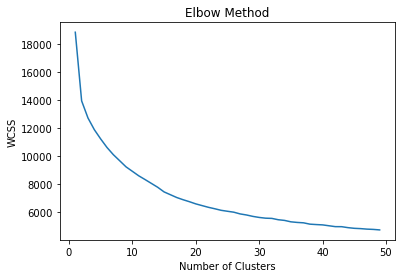

In [83]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(vectorized_essays)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [91]:
from sklearn import cluster
from sklearn import metrics

kmeans = cluster.KMeans(n_clusters=30)

kmeans.fit(vectorized_essays) 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(vectorized_essays))
 
silhouette_score = metrics.silhouette_score(vectorized_essays, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[20 19 29 ... 25  3 17]
Centroids data
[[ 0.02400034 -0.04573338  0.00188524 ...  0.55455772 -0.01353546
   0.06495564]
 [ 0.26055646 -0.15469304 -0.0637699  ...  0.31840812 -0.01113389
  -0.0908724 ]
 [ 0.34566154 -0.03941946 -0.19641274 ... -0.19057869 -0.14617642
  -0.17261832]
 ...
 [ 0.17482506 -0.10280469 -0.22424018 ... -0.04602234 -0.26066659
  -0.12756627]
 [ 0.27822155 -0.26585441 -0.05699473 ...  0.14743784  0.09288517
  -0.06243169]
 [ 0.08848742 -0.0841105  -0.25925546 ...  0.18063484 -0.1237735
  -0.22510014]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-5637.993615452478
Silhouette_score: 
0.19528913


### Checking most representative terms per cluster

In [93]:
print("Most representative terms per cluster (based on centroids):")
for i in range(30):
    tokens_per_cluster = ""
    most_representative = W2V_model.wv.most_similar(positive=[kmeans.cluster_centers_[i]], topn=20)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: nowadays antisocial harmful misuse technology communicates connection sociable vice outer technological efficiency sussed destroy transport incorrectly sacred everywhere contact facility 
Cluster 1: somethings doesn't your actively accomplish you've something always satisfied themselves complicate thirdly enthusiastic push wonderful int retry appreciate tough willing 
Cluster 2: graduate earlier early prepare collage credit graduation finish prepared college carrier highschool flexible available enter rush requirement diploma fulltime certificate 
Cluster 3: chooses ourself yourself if themselves depends humidity persuade int reputation intention demonstrate pathway differently realise appearance you carefully reflect judgment 
Cluster 4: relaxation summer evening stressful shorter longer period rush relief opt yearround plus schoolwork vacation flexible available reduces educator nigh obligation 
Cluster 5: themsel

In [109]:
df_clusters_30 = pd.DataFrame({
    "text": proc_data_3['full_text'],
    "tokens": [" ".join(text) for text in processed_essays],
    "cluster": labels})

df_clusters_30

,text,tokens,cluster
0,I think that students would benefit from learn...,think student would benefit learn home wont ch...,20
1,When a problem is a change you have to let it ...,problem change let best matter happen change m...,19
2,"Dear, Principal\n\nIf u change the school poli...",dear principal change school policy grade aver...,29
3,The best time in life is when you become yours...,best time life become agree great accomplishme...,5
4,Small act of kindness can impact in other peop...,small act kindness impact people change people...,19
...,...,...,...
3906,I believe using cellphones in class for educat...,believe use cellphone class education goodbye ...,15
3907,"Working alone, students do not have to argue w...",work alone student argue decision project work...,9
3908,"""A problem is a chance for you to do your best...",problem chance best think quote cant best ever...,25
3909,Many people disagree with Albert Schweitzer's ...,many people disagree albert schweitzer quote e...,3


In [153]:
df_clusters_30.groupby(['cluster'])['text'].agg(['count']).sort_values(by='count',ascending=False)

,count
cluster,
25,262
8,200
19,196
5,186
20,186
0,168
17,166
11,166
13,163


### Seeing essays inside a cluster to find topics

In [158]:
test_cluster = 0

most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_essays - kmeans.cluster_centers_[test_cluster], axis=1))

for d in most_representative_docs[:3]:
    print(proc_data_3['full_text'][d])
    print("-------------")

First of all technology has helped people in many ways to do various sort of things when people are in need of something. When technology was first introduced many people didnt know how it could be used to help save lives or help build buldings,schools,malls everything that we have today is because of how benefical technology is to us. The lack of human contact is not using technology too, much its by the person who chooses to use his or hers cellphone, computer and television while technology takes a important positive impact in peoples lives it also helps save peoples lives. For example in hospitals technology evolves every year so that when people come in very sick it helps them by detetecting what they have or whats going on with a accurate solution.

However people may say that technology has negative effects on people because it removes there social skills and the way people interact with each other because in older generations there was a lack of technology and people would comm

In [118]:
#8 - Extending School Work
#20 - School at home
#0 - Effect of technology on health 


#1 - Hard Work
#2 - 4 vs 3 years of high school
#3 - Personal Character
#4 - Being yourself
#5 - Personal Happiness
#6 - School Lunches


In [194]:
# Visualizing the clusters

df_clusters_30

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, init='pca', perplexity=15).fit_transform(vectorized_essays)

In [134]:
pd.DataFrame(X_embedded)[1]
df_clusters_30['X_coord']=pd.DataFrame(X_embedded)[0]
df_clusters_30['Y_coord']=pd.DataFrame(X_embedded)[1]

df_clusters_30

,text,tokens,cluster,X_coord,Y_coord
0,I think that students would benefit from learn...,think student would benefit learn home wont ch...,20,63.361088,2.470409
1,When a problem is a change you have to let it ...,problem change let best matter happen change m...,19,-37.701870,-4.927575
2,"Dear, Principal\n\nIf u change the school poli...",dear principal change school policy grade aver...,29,26.863712,-20.620420
3,The best time in life is when you become yours...,best time life become agree great accomplishme...,5,-33.110794,-2.720054
4,Small act of kindness can impact in other peop...,small act kindness impact people change people...,19,-37.964928,-18.916214
...,...,...,...,...,...
3906,I believe using cellphones in class for educat...,believe use cellphone class education goodbye ...,15,33.809170,-62.675323
3907,"Working alone, students do not have to argue w...",work alone student argue decision project work...,9,6.258830,82.066078
3908,"""A problem is a chance for you to do your best...",problem chance best think quote cant best ever...,25,-50.026489,43.566299
3909,Many people disagree with Albert Schweitzer's ...,many people disagree albert schweitzer quote e...,3,-16.385010,-21.040705


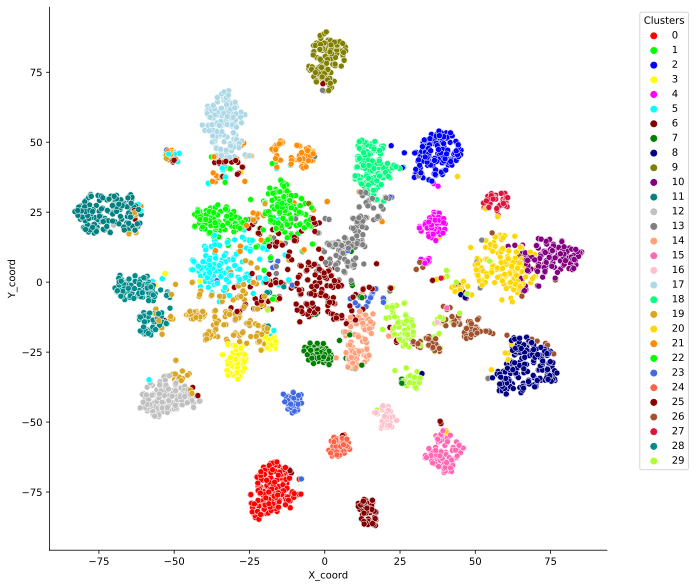

In [195]:
plt.rcParams["figure.figsize"] = (10,10)
#plt.scatter('X_coord','Y_coord',data=df_clusters_30,c='cluster')
color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800000', '#008000', '#000080', 
              '#808000', '#800080', '#008080', '#C0C0C0', '#808080', '#FFA07A', '#FF69B4', '#FFC0CB', '#ADD8E6', 
              '#00FF7F', '#DAA520', '#FFD700', '#FF8C00', '#00FF00', '#4169E1', '#FF6347', '#8B0000', '#A0522D', 
              '#DC143C', '#008B8B', '#ADFF2F']

my_palette = sns.color_palette(color_list)

sns.scatterplot(data=df_clusters_30, x='X_coord', y='Y_coord', hue='cluster', palette=my_palette)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()

plt.show()

---------

In [159]:
df_clusters_30

,text,tokens,cluster,X_coord,Y_coord
0,I think that students would benefit from learn...,think student would benefit learn home wont ch...,20,63.361088,2.470409
1,When a problem is a change you have to let it ...,problem change let best matter happen change m...,19,-37.701870,-4.927575
2,"Dear, Principal\n\nIf u change the school poli...",dear principal change school policy grade aver...,29,26.863712,-20.620420
3,The best time in life is when you become yours...,best time life become agree great accomplishme...,5,-33.110794,-2.720054
4,Small act of kindness can impact in other peop...,small act kindness impact people change people...,19,-37.964928,-18.916214
...,...,...,...,...,...
3906,I believe using cellphones in class for educat...,believe use cellphone class education goodbye ...,15,33.809170,-62.675323
3907,"Working alone, students do not have to argue w...",work alone student argue decision project work...,9,6.258830,82.066078
3908,"""A problem is a chance for you to do your best...",problem chance best think quote cant best ever...,25,-50.026489,43.566299
3909,Many people disagree with Albert Schweitzer's ...,many people disagree albert schweitzer quote e...,3,-16.385010,-21.040705


In [161]:
# Separating Target Variables
cohesion = proc_data_3.cohesion.values
syntax = proc_data_3.syntax.values
vocabulary = proc_data_3.vocabulary.values
phraseology = proc_data_3.phraseology.values
grammar = proc_data_3.grammar.values
conventions = proc_data_3.conventions.values

Y = proc_data_3[['cohesion','syntax','vocabulary','phraseology','grammar','conventions']]
print(Y)

      cohesion  syntax  vocabulary  phraseology  grammar  conventions
0          3.5     3.5         3.0          3.0      4.0          3.0
1          2.5     2.5         3.0          2.0      2.0          2.5
2          3.0     3.5         3.0          3.0      3.0          2.5
3          4.5     4.5         4.5          4.5      4.0          5.0
4          2.5     3.0         3.0          3.0      2.5          2.5
...        ...     ...         ...          ...      ...          ...
3906       2.5     3.0         3.0          3.5      2.5          2.5
3907       4.0     4.0         4.0          4.0      3.5          3.0
3908       2.5     3.0         3.0          3.0      3.5          3.0
3909       4.0     4.5         4.5          4.0      4.5          4.5
3910       3.5     2.5         3.5          3.0      3.0          3.5

[3911 rows x 6 columns]


In [172]:
df_clusters_30['cohesion'] = proc_data_3.cohesion.values
df_clusters_30['syntax'] = proc_data_3.syntax.values
df_clusters_30['vocabulary'] = proc_data_3.vocabulary.values
df_clusters_30['phraseology'] = proc_data_3.phraseology.values
df_clusters_30['grammar'] = proc_data_3.grammar.values
df_clusters_30['conventions'] = proc_data_3.conventions.values
df_clusters_30['avg_score'] = df_clusters_30[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']].mean(axis=1)
df_clusters_30['sum_score'] = df_clusters_30[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']].sum(axis=1)


In [173]:
df_clusters_30

,text,tokens,cluster,X_coord,Y_coord,cohesion,syntax,vocabulary,phraseology,grammar,conventions,num_mistakes,avg_score,sum_score
0,I think that students would benefit from learn...,think student would benefit learn home wont ch...,20,63.361088,2.470409,3.5,3.5,3.0,3.0,4.0,3.0,0,3.333333,20.0
1,When a problem is a change you have to let it ...,problem change let best matter happen change m...,19,-37.701870,-4.927575,2.5,2.5,3.0,2.0,2.0,2.5,0,2.416667,14.5
2,"Dear, Principal\n\nIf u change the school poli...",dear principal change school policy grade aver...,29,26.863712,-20.620420,3.0,3.5,3.0,3.0,3.0,2.5,0,3.000000,18.0
3,The best time in life is when you become yours...,best time life become agree great accomplishme...,5,-33.110794,-2.720054,4.5,4.5,4.5,4.5,4.0,5.0,0,4.500000,27.0
4,Small act of kindness can impact in other peop...,small act kindness impact people change people...,19,-37.964928,-18.916214,2.5,3.0,3.0,3.0,2.5,2.5,11,2.750000,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,I believe using cellphones in class for educat...,believe use cellphone class education goodbye ...,15,33.809170,-62.675323,2.5,3.0,3.0,3.5,2.5,2.5,11,2.833333,17.0
3907,"Working alone, students do not have to argue w...",work alone student argue decision project work...,9,6.258830,82.066078,4.0,4.0,4.0,4.0,3.5,3.0,14,3.750000,22.5
3908,"""A problem is a chance for you to do your best...",problem chance best think quote cant best ever...,25,-50.026489,43.566299,2.5,3.0,3.0,3.0,3.5,3.0,9,3.000000,18.0
3909,Many people disagree with Albert Schweitzer's ...,many people disagree albert schweitzer quote e...,3,-16.385010,-21.040705,4.0,4.5,4.5,4.0,4.5,4.5,0,4.333333,26.0


In [175]:
df_clusters_30.groupby(['cluster'])['sum_score'].agg(['mean']).sort_values(by='mean',ascending=False)

,mean
cluster,
4,20.097403
14,19.542056
21,19.438525
23,19.409722
3,19.357143
0,19.139881
9,19.115942
20,19.104839
24,19.075472


In [176]:
# Not that much difference between different topics and average scores

------------

# Phase 3 - Word2Vec Modeling

In [184]:
# Separating Target Variables
cohesion = proc_data_3.cohesion.values
syntax = proc_data_3.syntax.values
vocabulary = proc_data_3.vocabulary.values
phraseology = proc_data_3.phraseology.values
grammar = proc_data_3.grammar.values
conventions = proc_data_3.conventions.values

Y = proc_data_3[['cohesion','syntax','vocabulary','phraseology','grammar','conventions']]
print(Y)

      cohesion  syntax  vocabulary  phraseology  grammar  conventions
0          3.5     3.5         3.0          3.0      4.0          3.0
1          2.5     2.5         3.0          2.0      2.0          2.5
2          3.0     3.5         3.0          3.0      3.0          2.5
3          4.5     4.5         4.5          4.5      4.0          5.0
4          2.5     3.0         3.0          3.0      2.5          2.5
...        ...     ...         ...          ...      ...          ...
3906       2.5     3.0         3.0          3.5      2.5          2.5
3907       4.0     4.0         4.0          4.0      3.5          3.0
3908       2.5     3.0         3.0          3.0      3.5          3.0
3909       4.0     4.5         4.5          4.0      4.5          4.5
3910       3.5     2.5         3.5          3.0      3.0          3.5

[3911 rows x 6 columns]


<AxesSubplot:ylabel='Count'>

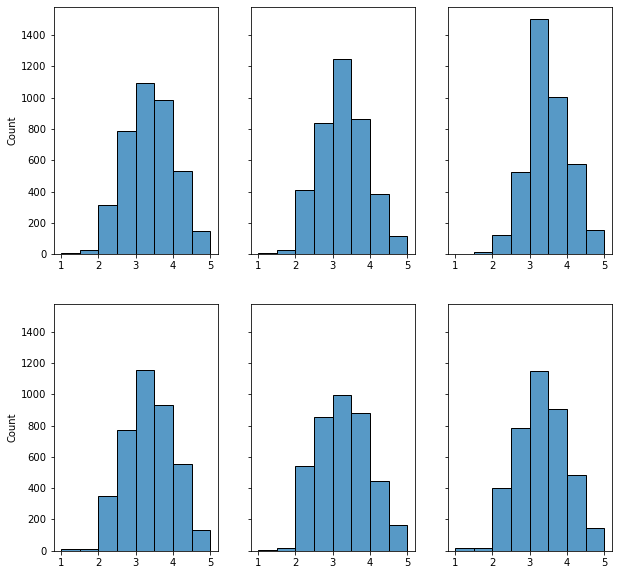

In [178]:
_, axes = plt.subplots(2, 3, sharey=True, figsize=(10, 10))
sns.histplot(cohesion, ax=axes[0,0], bins=8)
sns.histplot(syntax, ax=axes[0,1], bins=8)
sns.histplot(vocabulary, ax=axes[0,2], bins=8)
sns.histplot(phraseology, ax=axes[1,0], bins=8)
sns.histplot(grammar, ax=axes[1,1], bins=8)
sns.histplot(conventions, ax=axes[1,2], bins=8)


In [186]:
X = pd.DataFrame(vectorized_essays)
X['sent_count']=proc_data_3['sent_count']
X['sent_len']=proc_data_3['sent_len']
X['word_count']=proc_data_3['word_count']
X['num_mistakes']=proc_data_3['num_mistakes']

X.head()
# Tabular representation of our data

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,sent_count,sent_len,word_count,num_mistakes
0,0.192116,-0.383650,-0.291932,-0.285273,0.137961,0.143153,0.366997,0.158991,-0.157446,0.286080,...,0.236027,-0.433624,0.167754,-0.091420,-0.182390,-0.212802,18,14.500000,261,0
1,0.181507,-0.281040,-0.238647,-0.357701,0.004274,0.203445,-0.428468,0.313413,-0.412996,0.203088,...,0.278699,-0.111213,0.224560,0.243486,0.377643,-0.103558,14,38.071429,533,0
2,0.289068,0.231915,-0.348405,-0.099131,0.036153,0.121853,0.405430,0.217177,-0.689919,0.393232,...,0.025444,-0.135008,0.281311,0.249730,-0.062722,-0.241775,19,16.842105,320,0
3,0.191005,-0.124452,-0.151742,-0.171810,-0.166310,0.329484,-0.243113,0.206742,-0.279025,-0.054752,...,0.060631,-0.115757,0.362628,0.279845,-0.060608,0.146193,36,20.222222,728,0
4,0.018271,-0.237860,-0.247563,-0.358571,-0.354199,0.462322,-0.333860,0.494915,-0.456310,0.000536,...,0.075860,-0.128672,0.467729,0.388241,0.138313,0.101053,3,78.000000,234,11


In [187]:
def dmp_first_regressor(model):
    regressor = model()
    regressor.fit(X_train, y_train)
    y_preds=regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    #print('RMSE with ',model,' is ',rmse)
    return rmse

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import xgboost as xgb
import catboost as cb

from sklearn.metrics import mean_squared_error

# SVR
# XGBRegressor
# RFRegressor
# AdaboostRegressor
# Catboost

mods = [LinearRegression, RandomForestRegressor, SVR, xgb.XGBRegressor, cb.CatBoostRegressor]
mods

[sklearn.linear_model._base.LinearRegression,
 sklearn.ensemble._forest.RandomForestRegressor,
 sklearn.svm._classes.SVR,
 xgboost.sklearn.XGBRegressor,
 catboost.core.CatBoostRegressor]

In [190]:
output=[]
for i in (Y.columns):
    #print("Currently investigating ",i)
    X = X
    y = Y[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for j in mods:
        #print ('Current Model is ',j)
        nested_output=[i,j,dmp_first_regressor(j)]
        print(nested_output)
        output.append(nested_output)

['cohesion', <class 'sklearn.linear_model._base.LinearRegression'>, 0.5767786818369458]
['cohesion', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.5843951201452259]
['cohesion', <class 'sklearn.svm._classes.SVR'>, 0.5895704081731976]
['cohesion', <class 'xgboost.sklearn.XGBRegressor'>, 0.6160561905088039]
Learning rate set to 0.049027
0:	learn: 0.6599999	total: 9.93ms	remaining: 9.92s
1:	learn: 0.6561961	total: 41.9ms	remaining: 20.9s
2:	learn: 0.6518768	total: 47.6ms	remaining: 15.8s
3:	learn: 0.6480010	total: 52.2ms	remaining: 13s
4:	learn: 0.6441237	total: 57.8ms	remaining: 11.5s
5:	learn: 0.6405928	total: 66.3ms	remaining: 11s
6:	learn: 0.6374985	total: 72.1ms	remaining: 10.2s
7:	learn: 0.6340340	total: 77.9ms	remaining: 9.66s
8:	learn: 0.6313297	total: 82.5ms	remaining: 9.09s
9:	learn: 0.6285228	total: 87.7ms	remaining: 8.68s
10:	learn: 0.6264006	total: 93.4ms	remaining: 8.4s
11:	learn: 0.6233810	total: 98.1ms	remaining: 8.08s
12:	learn: 0.6207492	total: 103ms	remain

In [192]:
pd.DataFrame(output)

,0,1,2
0,cohesion,<class 'sklearn.linear_model._base.LinearRegre...,0.576779
1,cohesion,<class 'sklearn.ensemble._forest.RandomForestR...,0.584395
2,cohesion,<class 'sklearn.svm._classes.SVR'>,0.589570
3,cohesion,<class 'xgboost.sklearn.XGBRegressor'>,0.616056
4,cohesion,<class 'catboost.core.CatBoostRegressor'>,0.576409
5,syntax,<class 'sklearn.linear_model._base.LinearRegre...,0.555297
6,syntax,<class 'sklearn.ensemble._forest.RandomForestR...,0.568863
7,syntax,<class 'sklearn.svm._classes.SVR'>,0.577943
8,syntax,<class 'xgboost.sklearn.XGBRegressor'>,0.586818
9,syntax,<class 'catboost.core.CatBoostRegressor'>,0.555232


# Phase 3 - Doc2Vec Modeling

In [101]:
df=pd.read_csv

processed_essays_train=[]
for x in proc_data_3['lemmatized_text']:
    processed_essays_train.append(x)

In [102]:
processed_essays_train[0]

['think',
 'student',
 'would',
 'benefit',
 'learn',
 'home',
 'wont',
 'change',
 'get',
 'early',
 'morning',
 'shower',
 'hair',
 'take',
 'class',
 'help',
 'house',
 'pay',
 'attention',
 'comfortable',
 'home',
 'hardest',
 'part',
 'school',
 'get',
 'ready',
 'wake',
 'brush',
 'teeth',
 'closet',
 'look',
 'cloth',
 'think',
 'picked',
 'outfit',
 'look',
 'mirror',
 "you'll",
 'either',
 'like',
 'look',
 'see',
 'stain',
 'change',
 'online',
 'class',
 'wear',
 'anything',
 'stay',
 'home',
 'wont',
 'need',
 'stress',
 'wear',
 'student',
 'usually',
 'take',
 'shower',
 'school',
 'either',
 'take',
 'sleep',
 'wake',
 'student',
 'smell',
 'good',
 'cause',
 'miss',
 'bus',
 'effect',
 'lesson',
 'time',
 'cause',
 'come',
 'late',
 'school',
 'online',
 'class',
 'wont',
 'need',
 'miss',
 'lesson',
 'cause',
 'get',
 'everything',
 'set',
 'take',
 'shower',
 'get',
 'ready',
 'home',
 'comfortable',
 'pay',
 'attention',
 'give',
 'advantage',
 'smarter',
 'even',
 '

In [29]:
# d2v import
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [30]:
processed_essays_train_tagged = [TaggedDocument(processed_essays_train[i], list(proc_data_3.iloc[i,2:8])) for i in range(0,len(processed_essays_train))]

In [31]:
processed_essays_train_tagged[-1]

TaggedDocument(words=['think', 'failure', 'main', 'thing', 'people', 'consist', 'goal', 'success', 'without', 'lose', 'enthusiasm', 'agree', 'important', 'role', 'failure', 'play', 'pursuit', 'success', 'life', 'think', 'failure', 'main', 'key', 'people', 'reach', 'goal', 'need', 'idea', 'failure', 'come', 'success', 'secondly', 'need', 'positive', 'mind', 'want', 'want', 'reach', 'success', 'life', 'last', 'prepared', 'failure', 'prepared', 'confront', 'failure', 'need', 'keep', 'mind', 'everything', 'go', 'way', 'want', 'time', 'always', 'need', 'mind', 'everything', 'possible', 'effort', 'first', 'people', 'need', 'idea', 'failure', 'come', 'success', 'everything', 'happens', 'reason', 'something', 'go', 'wrong', 'certain', 'reason', 'moment', 'try', 'success', 'need', 'accept', 'thing', 'keep', 'try', 'need', 'really', 'patience', 'example', 'baby', 'try', 'walk', 'fall', 'many', 'time', 'get', 'keep', 'try', 'reach', 'goal', 'case', 'walk', 'many', 'case', 'people', 'car', 'accide

In [32]:
doc2vecModel = Doc2Vec(vector_size=200, window=2, dm=0,min_count=20, workers=8, epochs = 60)
#build vocab
doc2vecModel.build_vocab(processed_essays_train_tagged)
#train model
doc2vecModel.train(processed_essays_train_tagged, total_examples=doc2vecModel.corpus_count, epochs=doc2vecModel.epochs)

In [33]:
# Discuss with Manish
print(len(processed_essays_train_tagged))
print(len(doc2vecModel.docvecs))


3911
9


In [34]:
doc_vector=[doc2vecModel.infer_vector(processed_essays_train[i]) for i in range(0,len(processed_essays_train))]

In [35]:
len(doc_vector)

3911

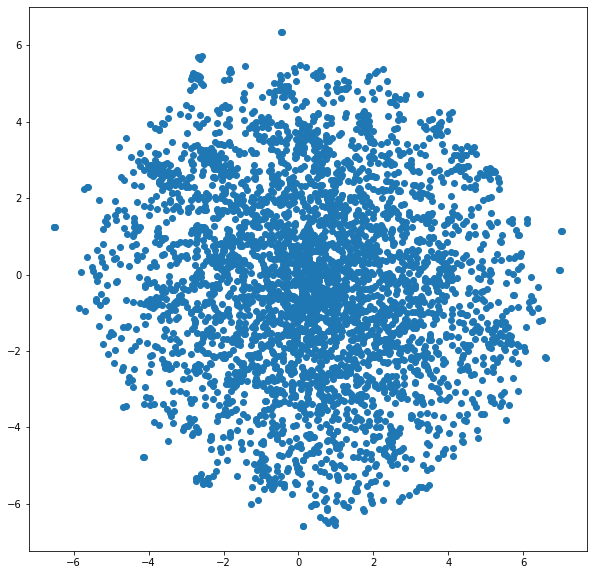

In [36]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, init='random', perplexity=30).fit_transform(doc_vector)

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

In [39]:
len(doc_vector[0])

200

## Baseline Modeling

In [58]:
# Separating Target Variables
cohesion = proc_data_3.cohesion.values
syntax = proc_data_3.syntax.values
vocabulary = proc_data_3.vocabulary.values
phraseology = proc_data_3.phraseology.values
grammar = proc_data_3.grammar.values
conventions = proc_data_3.conventions.values

Y = proc_data_3[['cohesion','syntax','vocabulary','phraseology','grammar','conventions']]
print(Y)

      cohesion  syntax  vocabulary  phraseology  grammar  conventions
0          3.5     3.5         3.0          3.0      4.0          3.0
1          2.5     2.5         3.0          2.0      2.0          2.5
2          3.0     3.5         3.0          3.0      3.0          2.5
3          4.5     4.5         4.5          4.5      4.0          5.0
4          2.5     3.0         3.0          3.0      2.5          2.5
...        ...     ...         ...          ...      ...          ...
3906       2.5     3.0         3.0          3.5      2.5          2.5
3907       4.0     4.0         4.0          4.0      3.5          3.0
3908       2.5     3.0         3.0          3.0      3.5          3.0
3909       4.0     4.5         4.5          4.0      4.5          4.5
3910       3.5     2.5         3.5          3.0      3.0          3.5

[3911 rows x 6 columns]


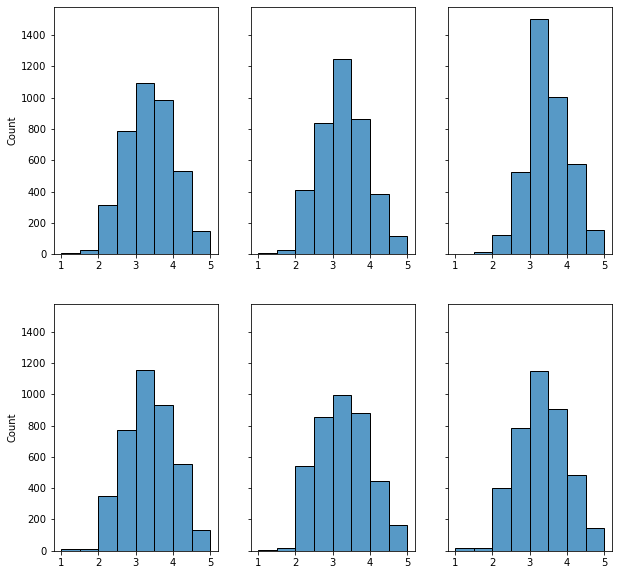

In [52]:
_, axes = plt.subplots(2, 3, sharey=True, figsize=(10, 10))
sns.histplot(cohesion, ax=axes[0,0], bins=8)
sns.histplot(syntax, ax=axes[0,1], bins=8)
sns.histplot(vocabulary, ax=axes[0,2], bins=8)
sns.histplot(phraseology, ax=axes[1,0], bins=8)
sns.histplot(grammar, ax=axes[1,1], bins=8)
sns.histplot(conventions, ax=axes[1,2], bins=8)


In [64]:
X = pd.DataFrame(doc_vector)
X['sent_count']=proc_data_3['sent_count']
X['sent_len']=proc_data_3['sent_len']
X['word_count']=proc_data_3['word_count']
X

# Tabular representation of our data

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,sent_count,sent_len,word_count
0,-0.179214,0.356290,-0.114753,0.521641,-0.211414,-0.112839,-0.528706,0.656564,-0.300483,1.151588,...,0.606738,0.496825,-0.799055,0.174988,-0.673146,0.464546,1.005852,18,14.500000,261
1,-0.170914,-0.171819,0.333515,-0.271629,0.145531,-0.223681,0.402173,0.894281,0.608721,0.173030,...,0.132468,0.070377,0.473242,0.039449,-0.244706,-0.526570,0.339428,14,38.071429,533
2,0.446901,0.593635,-0.556510,0.734098,-0.358913,-0.086004,-0.275171,0.026408,0.389987,1.324631,...,0.148761,0.885454,-0.762823,0.294997,0.391588,0.430580,0.473169,19,16.842105,320
3,-0.126590,-0.672814,-0.228914,-0.837389,0.240610,-1.427670,0.839180,0.186094,-0.104259,0.416369,...,0.318731,1.204564,0.661944,-0.624463,-0.443464,1.320315,-0.359129,36,20.222222,728
4,-0.220878,-0.465762,-0.038425,0.693283,-0.590883,-0.061557,-0.418841,0.363514,-0.961032,-0.251499,...,0.237479,-0.419751,-0.256970,-0.234229,-0.562201,-0.006396,0.488925,3,78.000000,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,0.090277,-0.218029,-1.125503,0.312250,0.535365,0.559597,-0.514516,0.371922,0.392657,-0.260121,...,0.547094,0.582711,0.171655,-0.175508,-0.215227,-0.008022,0.694553,6,29.833333,179
3907,-0.483668,-0.685489,0.172665,-0.116938,0.502064,-0.441247,0.571535,0.506323,-0.116704,0.561754,...,-0.618443,0.290135,-0.170314,-0.457711,-0.345367,0.110845,0.268452,16,29.062500,465
3908,-0.501839,-0.204954,0.163235,-0.284400,-0.428505,-0.024219,0.156125,-0.011682,0.314756,0.307994,...,0.508485,0.066110,0.076742,0.502115,-0.582722,0.295118,-0.172138,8,32.125000,257
3909,-0.762649,-1.732807,-0.578913,1.193956,0.380346,-0.595412,0.129188,0.370553,0.163133,-0.076796,...,-0.414380,-0.445006,-0.479151,-0.043695,-0.636893,0.672943,-0.401789,21,24.285714,510


In [67]:
# Inspecting Cohesion
X = X
y = Y['cohesion']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (3128, 203)
X_test:  (783, 203)
y_train:  (3128,)
y_test:  (783,)


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import xgboost as xgb
import catboost as cb

from sklearn.metrics import mean_squared_error

# SVR
# XGBRegressor
# RFRegressor
# AdaboostRegressor
# Catboost

mods = [LinearRegression, RandomForestRegressor, SVR, xgb.XGBRegressor, cb.CatBoostRegressor]
mods

[sklearn.linear_model._base.LinearRegression,
 sklearn.ensemble._forest.RandomForestRegressor,
 sklearn.svm._classes.SVR,
 xgboost.sklearn.XGBRegressor,
 catboost.core.CatBoostRegressor]

In [83]:
def dmp_first_regressor(model):
    regressor = model()
    regressor.fit(X_train, y_train)
    y_preds=regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    #print('RMSE with ',model,' is ',rmse)
    return rmse


In [ ]:
for i in mods:
    print(i)
    mod_run=dmp_first_regressor(i)
    print('\n')

In [85]:
output=[]
for i in (Y.columns):
    #print("Currently investigating ",i)
    X = X
    y = Y[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for j in mods:
        #print ('Current Model is ',j)
        nested_output=[i,j,dmp_first_regressor(j)]
        print(nested_output)
        output.append(nested_output)
    print(output)


['cohesion', <class 'sklearn.linear_model._base.LinearRegression'>, 0.5370925359606139]
['cohesion', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.5671122881598182]
['cohesion', <class 'sklearn.svm._classes.SVR'>, 0.5977252549796671]
['cohesion', <class 'xgboost.sklearn.XGBRegressor'>, 0.6011611357395854]
Learning rate set to 0.049027
0:	learn: 0.6602864	total: 19.1ms	remaining: 19.1s
1:	learn: 0.6559014	total: 28.7ms	remaining: 14.3s
2:	learn: 0.6515702	total: 37.6ms	remaining: 12.5s
3:	learn: 0.6466457	total: 45.2ms	remaining: 11.3s
4:	learn: 0.6420504	total: 54.5ms	remaining: 10.8s
5:	learn: 0.6376074	total: 62.3ms	remaining: 10.3s
6:	learn: 0.6339812	total: 70.4ms	remaining: 9.99s
7:	learn: 0.6302685	total: 79.1ms	remaining: 9.81s
8:	learn: 0.6265967	total: 86.5ms	remaining: 9.52s
9:	learn: 0.6236586	total: 94.3ms	remaining: 9.34s
10:	learn: 0.6207650	total: 102ms	remaining: 9.19s
11:	learn: 0.6178802	total: 111ms	remaining: 9.13s
12:	learn: 0.6151973	total: 119ms	rem

In [86]:
for x in output:
    print(x)

['cohesion', <class 'sklearn.linear_model._base.LinearRegression'>, 0.5370925359606139]
['cohesion', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.5671122881598182]
['cohesion', <class 'sklearn.svm._classes.SVR'>, 0.5977252549796671]
['cohesion', <class 'xgboost.sklearn.XGBRegressor'>, 0.6011611357395854]
['cohesion', <class 'catboost.core.CatBoostRegressor'>, 0.5362381544436924]
['syntax', <class 'sklearn.linear_model._base.LinearRegression'>, 0.5117894892031317]
['syntax', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.5553427945085053]
['syntax', <class 'sklearn.svm._classes.SVR'>, 0.5897682085295065]
['syntax', <class 'xgboost.sklearn.XGBRegressor'>, 0.5660656767036184]
['syntax', <class 'catboost.core.CatBoostRegressor'>, 0.514866391120363]
['vocabulary', <class 'sklearn.linear_model._base.LinearRegression'>, 0.46696122465330553]
['vocabulary', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.49859070225790736]
['vocabulary', <class 'sklearn.s

In [ ]:
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print(rmse)


------------

In [193]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(train_x,train_y)
y_preds=model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, y_preds))
print(rmse)

0.5261617020022412
